# vechicle_performance

# Using Stochastic Gradient Descent Linear Regression Model

### Importing Libraries

In [1]:
# loading the library

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

### Importing Dataset

In [2]:
# loading the data
df=pd.read_csv('vehicle_performance.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
# see the data
# exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.shape

(398, 9)

### Checking for Null values

In [5]:
# to find the null values in the data
# checking the missing values
df.isnull().sum()     # no missing values in the data


origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [6]:
# or you can put in the variable and check for the null values so that it looks better 
miss_val=df.isnull().sum()
miss_val[miss_val>0]

Series([], dtype: int64)

No Missing values in the data

<Axes: >

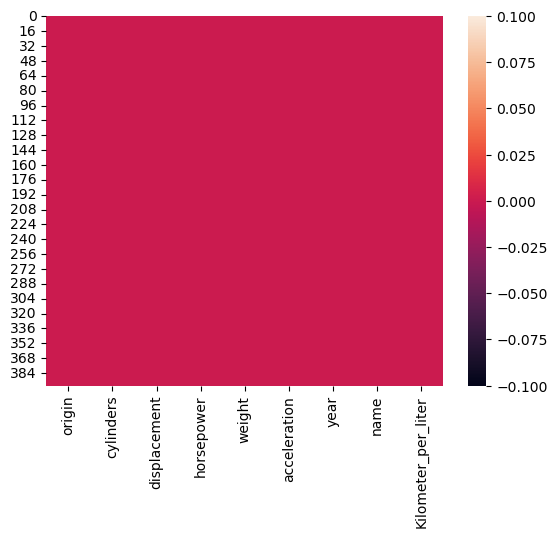

In [7]:
# will visualize it
sns.heatmap(df.isnull())

### Always we want to start performing EDA based on target variable

# Target variable   [Kilometer_per_liter]

In [8]:
df.Kilometer_per_liter.describe()

count    398.000000
mean       9.997073
std        3.322917
min        3.826293
25%        7.440015
50%        9.778305
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

In [9]:
df.Kilometer_per_liter.head(20)

0      7.652587
1      6.377156
2      7.652587
3      6.802299
4      7.227443
5      6.377156
6      5.952012
7      5.952012
8      5.952012
9      6.377156
10     6.377156
11     5.952012
12     6.377156
13     5.952012
14    10.203449
15     9.353162
16     7.652587
17     8.928018
18    11.478880
19    11.053736
Name: Kilometer_per_liter, dtype: float64

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 3.82629337,  5.42483371,  7.02337405,  8.62191439, 10.22045473,
        11.81899507, 13.41753541, 15.01607575, 16.61461609, 18.21315643,
        19.81169677]),
 <BarContainer object of 10 artists>)

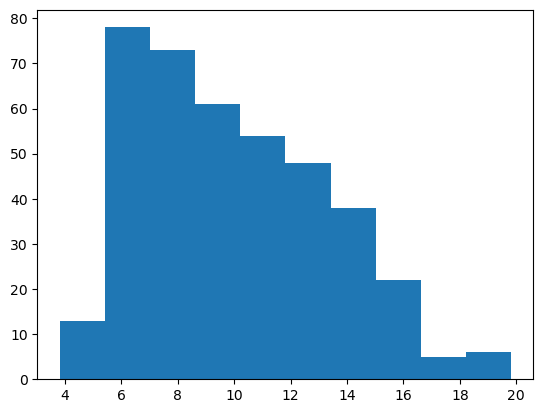

In [10]:
plt.hist(df.Kilometer_per_liter)

<Axes: xlabel='Kilometer_per_liter', ylabel='Density'>

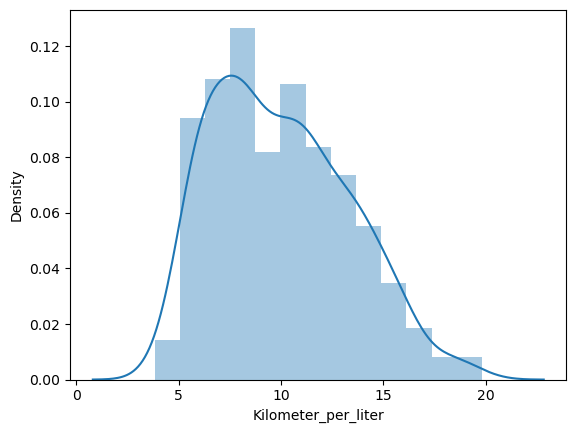

In [11]:
# Will check the distribution of the data
sns.distplot(df.Kilometer_per_liter)

The data is almost normally distributed

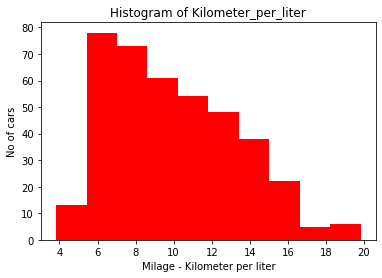

In [8]:
# histogram of the Kilometer_per_liter
plt.hist(df.Kilometer_per_liter,color='red')
plt.xlabel('Milage - Kilometer per liter')
plt.ylabel('No of cars')
plt.title('Histogram of Kilometer_per_liter')
plt.show()

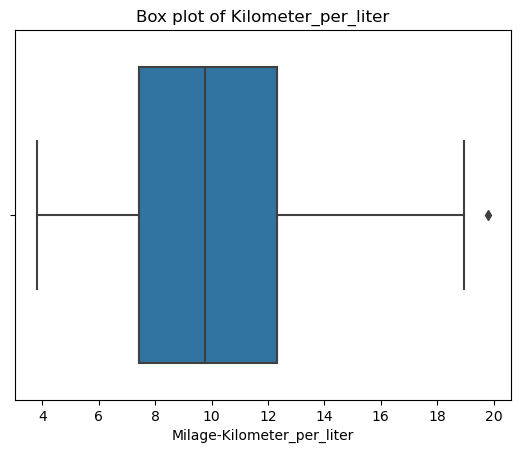

In [11]:
# box plot of Kilometer_per_liter
sns.boxplot(df.Kilometer_per_liter)
plt.xlabel('Milage-Kilometer_per_liter')
plt.title('Box plot of Kilometer_per_liter')
plt.show()

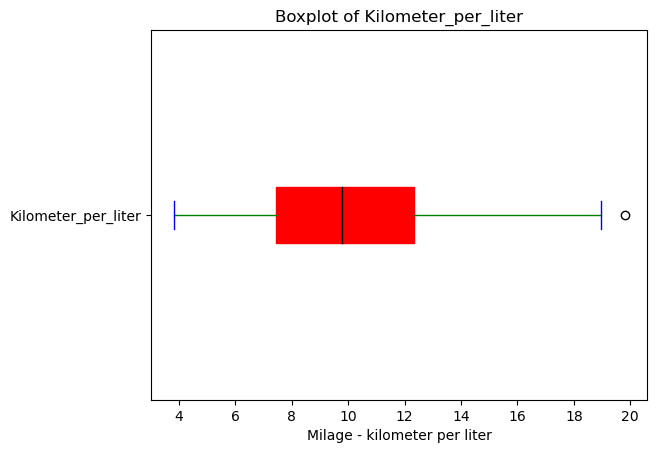

In [14]:
# or you can do the boxplot in different way
props2=dict(boxes='red',whiskers='green',medians='black',caps='blue')
df.Kilometer_per_liter.plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('Milage - kilometer per liter')
plt.title('Boxplot of Kilometer_per_liter')
plt.show()

### Now will check for outliers (If we have extreme outliers we need to drop the outliers)

In [15]:
# How many outliers are present
# checking the outliers

# Now we are going to perform IQR [Inter Quartile Range] using IQR = Q3 - Q1
kpl_IQR=df.Kilometer_per_liter.describe()['75%']-df.Kilometer_per_liter.describe()['25%']
print('kpl_IQR =',kpl_IQR)

# Now will try to create upper end using UE= Q3+1.5*IQR
kpl_uplim=df.Kilometer_per_liter.describe()['75%']+1.5*kpl_IQR         
print('kpl_uplim =',kpl_uplim)

kpl_IQR = 4.889152635448127
kpl_uplim = 19.66289646865008


In [16]:
len(df.Kilometer_per_liter[df.Kilometer_per_liter>kpl_uplim])

1

### Alternative way of detecting the outliers

In [17]:
# or you can do in this way
kpl_IQR=df.Kilometer_per_liter.quantile(0.75)-df.Kilometer_per_liter.quantile(0.25)
print('kpl_IQR =',kpl_IQR)
kpl_HE=df.Kilometer_per_liter.quantile(0.75)+(1.5*kpl_IQR)
print('kpl_HE =',kpl_HE)
kpl_LE=df.Kilometer_per_liter.quantile(0.25)-(1.5*kpl_IQR)
print('kpl_LE =',kpl_LE)
len(df.Kilometer_per_liter[df.Kilometer_per_liter>kpl_HE])

kpl_IQR = 4.889152635448127
kpl_HE = 19.66289646865008
kpl_LE = 0.10628592685756999


1

## Their is only one outliers present in the data so we are ignoring it

In [18]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

# Origin  (its a categorical variable)

In [19]:
# 2___origin -------
# country origin (given numbers only)
df.origin.value_counts()    # thier are only 3 countries with counts

origin
1    249
3     79
2     70
Name: count, dtype: int64

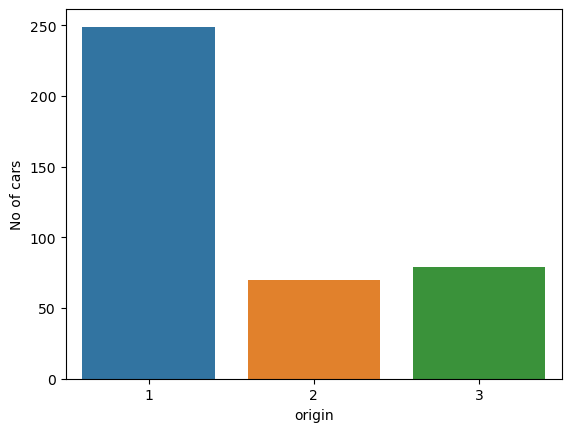

In [23]:
# barplot
sns.countplot(x = df.origin)
plt.ylabel('No of cars')
plt.show()

In [24]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

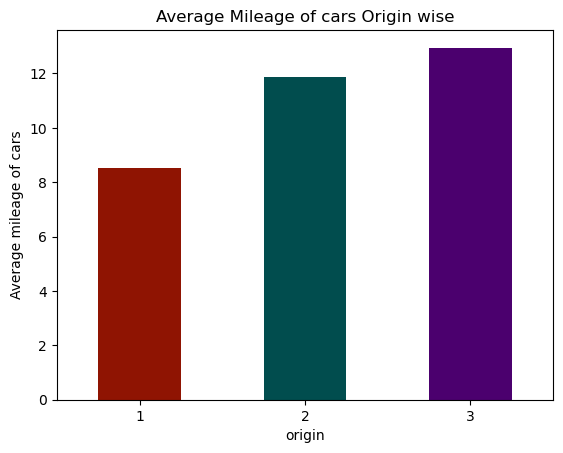

In [25]:
# Kilometer_per_liter (mileage) vs origin

df.groupby('origin')['Kilometer_per_liter'].mean().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e'])
plt.ylabel('Average mileage of cars')
plt.xticks(rotation=0)
plt.title('Average Mileage of cars Origin wise')
plt.show()

In [22]:
# If you want to print the numbers you can print 
df.groupby('origin')['Kilometer_per_liter'].mean()

origin
1     8.538388
2    11.857865
3    12.945895
Name: Kilometer_per_liter, dtype: float64

#### The above graph is saying that the average mileage of cars in country(1) is 8.5,the average mileage of cars in country(2) is 11.85,the average mileage of cars country(3) is 12.9 

In [27]:
df.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

### Now will perform some statistical test to check Origin is a good predictor or not

### Importing the Libraries for Statistical test

In [26]:
# Statistical test

# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)

import statsmodels.formula.api as smf

In [28]:
df.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [24]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

### Anova Test 

In [29]:
model_origin = ols('Kilometer_per_liter ~ origin',data = df).fit()
anova_origin = sm.stats.anova_lm(model_origin)
anova_origin

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,1391.68420,1391.684200,184.199639,1.011482e-34
Residual,396.0,2991.90023,7.555304,NaN,NaN


Origin is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant.

# Cylinder   (its a categorical variable)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [31]:
# 3 cylinders -------
# no of cylinders
df.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [32]:
df.cylinders.value_counts().sum()

398

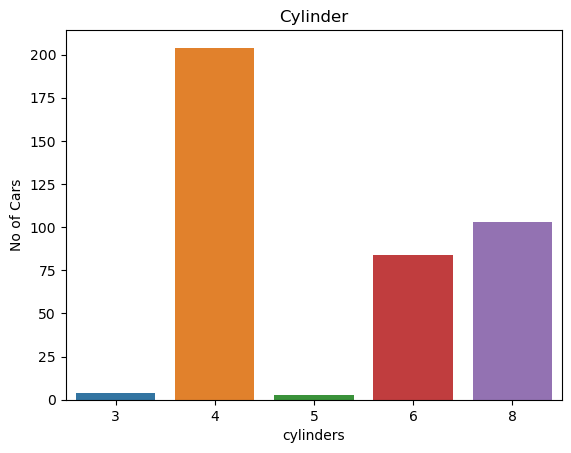

In [34]:
# Barplot
sns.countplot(x = df.cylinders)
plt.ylabel('No of Cars')
plt.title('Cylinder')
plt.show()

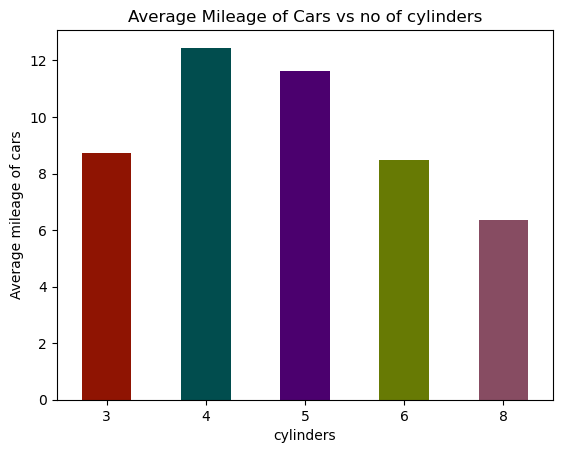

In [35]:
# Kilometer_per_liter (mileage) vs cylinder

df.groupby('cylinders')['Kilometer_per_liter'].mean().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e','#677a04','#874c62'])
plt.ylabel('Average mileage of cars')
plt.xticks(rotation=0)
plt.title('Average Mileage of Cars vs no of cylinders')
plt.show()

In [36]:
df.groupby('cylinders')['Kilometer_per_liter'].mean()

cylinders
3     8.736703
4    12.451084
5    11.634766
6     8.496801
8     6.361471
Name: Kilometer_per_liter, dtype: float64

In [34]:
# the above graph says that the average miliage of cars of 3 cylinders 8.736
# the above graph says that the average miliage of cars of 4 cylinders 12.45
# the above graph says that the average miliage of cars of 5 cylinders 11.63
# the above graph says that the average miliage of cars of 6 cylinders 8.49
# the above graph says that the average miliage of cars of 8 cylinders 6.36

In [37]:
model_cylinders = ols('Kilometer_per_liter ~ cylinders',data = df).fit()
anova_cylinders = sm.stats.anova_lm(model_cylinders)
anova_cylinders

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,2635.58367,2635.583670,597.077048,4.503992e-81
Residual,396.0,1748.00076,4.414143,NaN,NaN


cylinders is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# displacement is a continuous variable

In [38]:
df.displacement.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

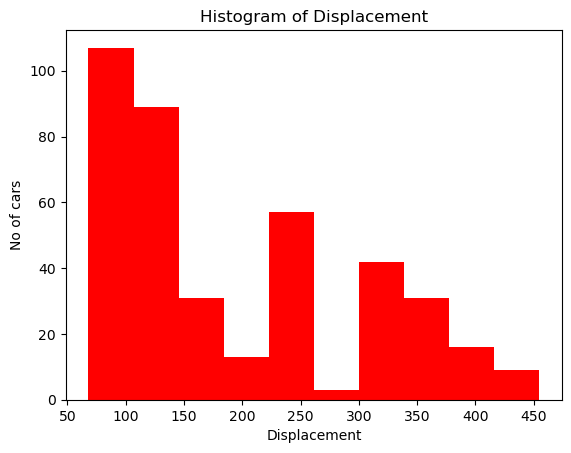

In [39]:
# histogram 
plt.hist(df.displacement,color='red')
plt.xlabel('Displacement')
plt.ylabel('No of cars')
plt.title('Histogram of Displacement')
plt.show()

<Axes: xlabel='displacement'>

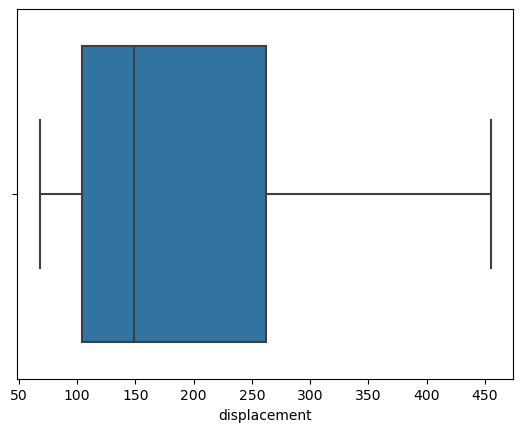

In [41]:
sns.boxplot(x = df.displacement)

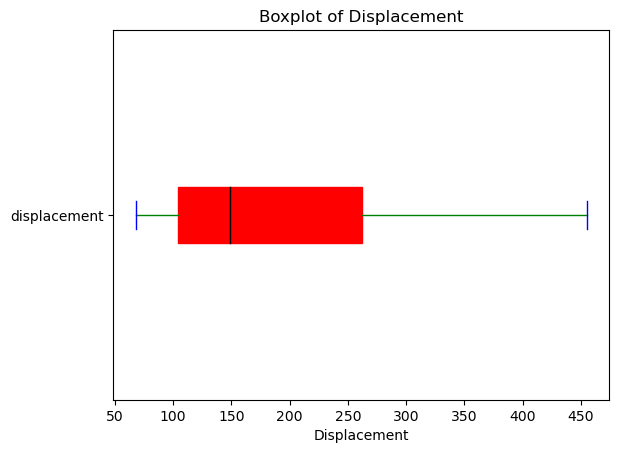

In [42]:
# or you can do the boxplot in this way as well 
df.displacement.plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('Displacement')
plt.title('Boxplot of Displacement')
plt.show()

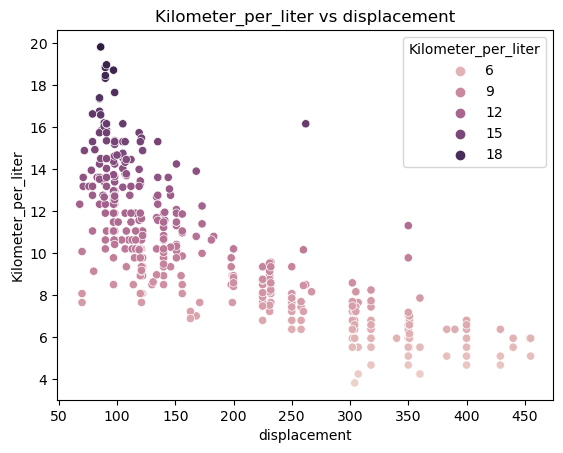

In [43]:
# scatterplot of Kilometer_per_liter vs displacement
sns.scatterplot(x='displacement',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Kilometer_per_liter vs displacement')
plt.show()

In [44]:
# will check the correlation coefficient between displacement and kilometer per liter
np.corrcoef(df.displacement,df.Kilometer_per_liter)

array([[ 1.        , -0.80420282],
       [-0.80420282,  1.        ]])

### The plot tells that when the displacement keep on increases mileage keeps on decreases its Negatively correlated
It is 80.42% negatively correlated 

### Displacement is a good predictor

# Horsepower

In [45]:
pd.set_option('display.max_rows',None)
df.horsepower.unique

<bound method Series.unique of 0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
30      90
31      95
32       ?
33     100
34     105
35     100
36      88
37     100
38     165
39     175
40     153
41     150
42     180
43     170
44     175
45     110
46      72
47     100
48      88
49      86
50      90
51      70
52      76
53      65
54      69
55      60
56      70
57      95
58      80
59      54
60      90
61      86
62     165
63     175
64     150
65     153
66     150
67     208
68     155
69     160
70     190
71      97
72     150
73     130
74     140
75     150
76     112
77      76
78      87
79      69
80      86
81      92
82      97
83      80
84      88
85     175
86     150
87     145
8

In [46]:
# will take the index which ever having the '?'
a=df.horsepower[df.horsepower=='?'].index

In [47]:
# You can see '?' in the data so to over come that will replace ? with na

df.horsepower[a]=df.horsepower[df.horsepower=='?'].replace('?',np.nan)

In [48]:
df.horsepower[df.horsepower=='?']

Series([], Name: horsepower, dtype: object)

In [49]:
df.horsepower.isnull().sum()

6

In [50]:
df.horsepower.dtypes       # its in object will replace with float64

dtype('O')

In [51]:
df.horsepower=df.horsepower.astype('float64')

In [52]:
df.horsepower.dtypes         # you can see now it has been converted in to float 

dtype('float64')

In [56]:
# You can perform the same operation while loading the data errors='coerce'    Where It will ignore all non-numeric values

In [55]:
df=pd.read_csv('vehicle_performance.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [71]:
# converting the data type object to int64
df.horsepower=pd.to_numeric(df.horsepower,errors='coerce')          # errors = 'coerce' will remove all non-numeric values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [72]:
# some data points in horsepower variable are '?' they converted to nan and then datatype is changed to float
df.horsepower.isnull().sum()     # their are 6 nan values

6

In [73]:
# removing nan values
df=df.dropna()                     # we have only 6 datapoints so we are droping the 6 records we can impute it by taking mean but just for practice sake i am going to remove it

In [74]:
df.horsepower.isnull().sum()

0

In [75]:
df.shape

(392, 9)

In [76]:
# distribution in horse power
df.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

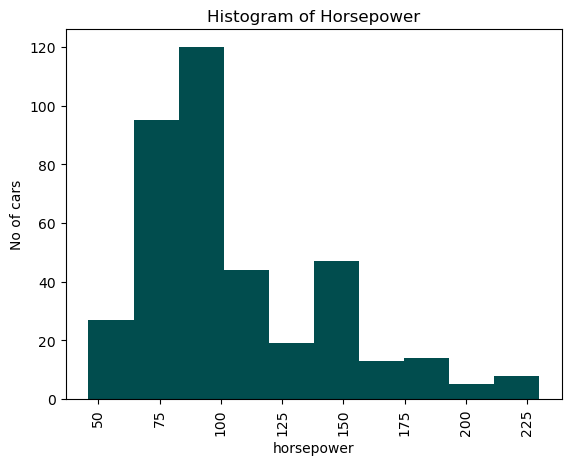

In [77]:
# histogram
plt.hist(df.horsepower,color='#014d4e')
plt.xlabel('horsepower')
plt.xticks(rotation=90)
plt.ylabel('No of cars')
plt.title('Histogram of Horsepower')
plt.show()

<Axes: xlabel='horsepower'>

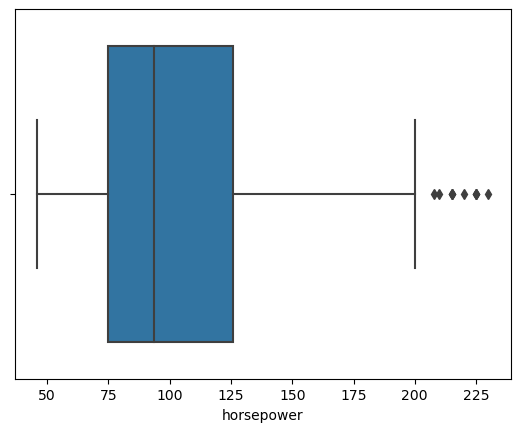

In [79]:
# box plot 
sns.boxplot(x = df.horsepower)

In [80]:
# checking the outliers
hp_IQR=df.horsepower.describe()['75%']-df.horsepower.describe()['25%']
print('hp_IQR =',hp_IQR)
hp_uplim=df.horsepower.describe()['75%']+1.5*hp_IQR
print('hp_uplim =',hp_uplim)
len(df.horsepower[df.horsepower>hp_uplim])     # their are 10 outliers ignore

hp_IQR = 51.0
hp_uplim = 202.5


10

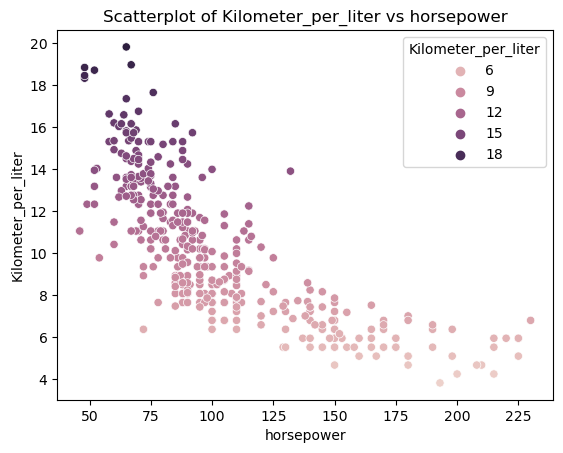

In [81]:
# scatterplot Kilometer_per_liter vs horsepower
sns.scatterplot(x='horsepower',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs horsepower')
plt.show()

In [82]:
np.corrcoef(df.horsepower,df.Kilometer_per_liter)

array([[ 1.        , -0.77842678],
       [-0.77842678,  1.        ]])

### The plot tells that when the Horsepower keep on increases mileage keeps on decreases its Negatively correlated
It is 77.84% negatively correlated

# Weight is a continuous variable

In [83]:
df.weight.value_counts()

weight
1985    4
2130    4
2125    3
2720    3
2945    3
2300    3
2265    3
2155    3
2408    2
2164    2
2395    2
3425    2
3410    2
4464    2
2635    2
1795    2
2220    2
2542    2
2065    2
2190    2
2950    2
1800    2
3672    2
2045    2
2110    2
1950    2
4215    2
2670    2
3725    2
1937    2
1975    2
2930    2
1990    2
1825    2
1965    2
3940    2
2745    1
2795    1
3245    1
2135    1
2965    1
3535    1
3570    1
2990    1
3155    1
2830    1
3140    1
3430    1
3210    1
3380    1
3070    1
3620    1
2405    1
3445    1
3205    1
4080    1
3735    1
2855    1
2230    1
2515    1
2560    1
2075    1
3365    1
3880    1
3755    1
3870    1
4055    1
4380    1
3820    1
3270    1
3150    1
2565    1
3193    1
3645    1
3574    1
3651    1
2035    1
3085    1
3012    1
1945    1
4060    1
2070    1
4140    1
2600    1
2815    1
3265    1
2051    1
2755    1
2740    1
1940    1
4335    1
4325    1
4165    1
4220    1
3525    1
3630    1
3520    1
4295    1
2890    1
405

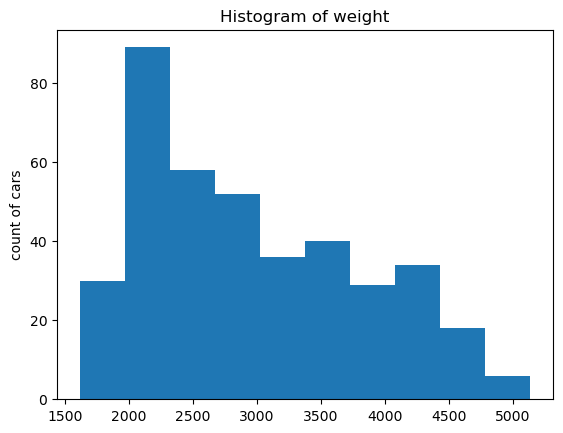

In [84]:
# histogram of weights
plt.hist(df.weight)
plt.title('Histogram of weight')
plt.ylabel('count of cars')
plt.show()

<Axes: xlabel='weight', ylabel='Density'>

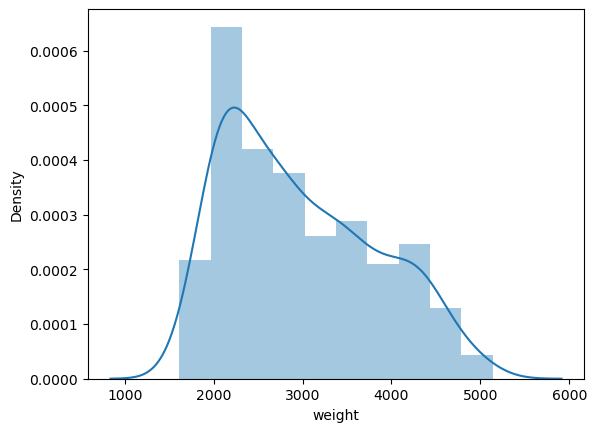

In [85]:
# will plot the distribution plot using seaborn library

sns.distplot(df.weight)

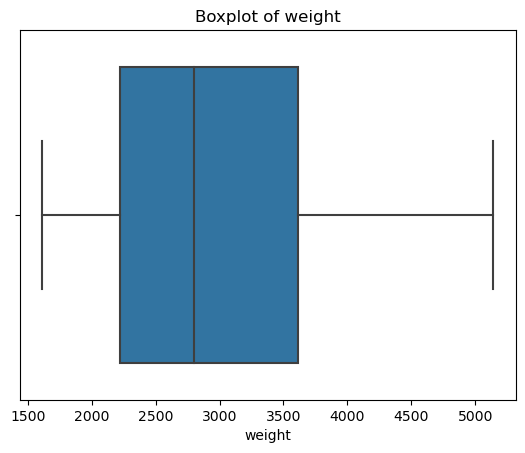

In [87]:
# boxplot
sns.boxplot(x = df.weight)
plt.title('Boxplot of weight')
plt.show()

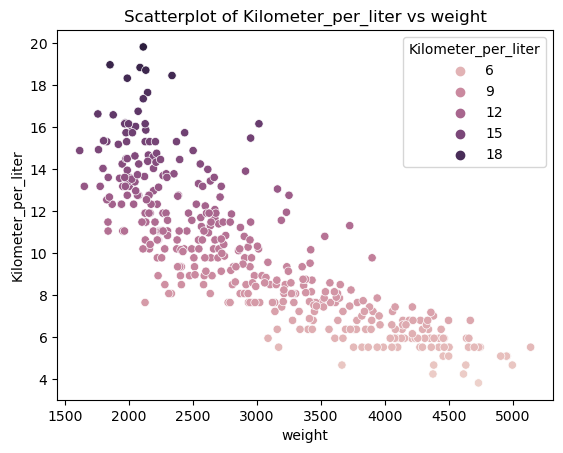

In [88]:
sns.scatterplot(x='weight',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.xlabel('weight')
plt.ylabel('Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs weight')
plt.show()

In [89]:
np.corrcoef(df.weight,df.Kilometer_per_liter)

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

### The plot tells that when the Weight keep on increases mileage keeps on decreases its Negatively correlated
It is 83.22% negatively correlated

# Accleration  [continious variable]

In [90]:
df.acceleration.value_counts()

acceleration
14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
15.0    14
16.5    13
17.0    13
13.0    12
19.0    11
12.0    10
16.4     9
18.0     8
12.5     8
11.5     7
14.9     7
11.0     7
13.2     6
19.5     6
15.8     6
18.2     5
14.4     5
14.7     5
21.0     5
18.5     5
17.3     4
15.7     4
17.6     4
15.4     4
18.6     4
17.5     4
16.9     4
10.0     4
16.2     4
14.8     3
15.2     3
16.6     3
19.4     3
19.2     3
16.7     3
15.3     3
14.2     3
12.8     3
17.7     3
17.8     2
12.2     2
13.4     2
15.1     2
18.7     2
17.2     2
9.5      2
20.5     2
13.8     2
20.1     2
15.9     2
11.4     2
8.5      2
19.6     2
13.7     2
16.8     2
13.9     2
22.2     2
12.9     2
13.6     2
17.4     2
12.6     2
21.8     1
19.9     1
23.7     1
18.3     1
16.1     1
20.7     1
17.9     1
20.4     1
17.1     1
15.6     1
24.6     1
21.7     1
11.2     1
18.1     1
18.8     1
11.3     1
24.8     1
14.3     1
10.5     1
9.0      1
8.0      1
23.5     1
21.5     1
14.1    

In [91]:
df.acceleration.isnull().sum()      # their is no null values in the data

0

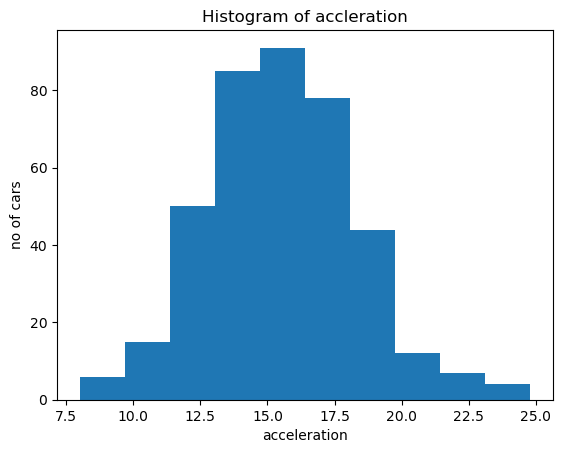

In [92]:
# ploting the histogram 
plt.hist(df.acceleration)
plt.xlabel('acceleration')
plt.ylabel('no of cars')
plt.title('Histogram of accleration')
plt.show()

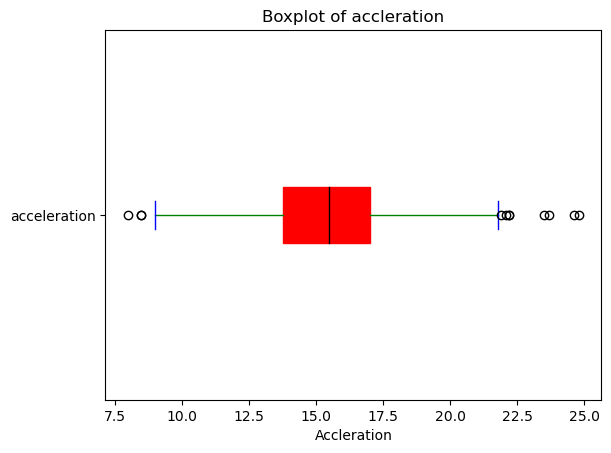

In [93]:
df.acceleration.plot.box(color=props2,patch_artist=True,vert=False)
plt.title('Boxplot of accleration')
plt.xlabel('Accleration')
plt.show()

In [94]:
# their is a outliers 
# checking the outliers
acc_IQR=df.acceleration.describe()['75%']-df.acceleration.describe()['25%']
acc_uplim=df.acceleration.describe()['75%']+(1.5*acc_IQR)
len(df.acceleration[df.acceleration>acc_uplim])

8

In [95]:
acc_lowlim=df.acceleration.describe()['25%']-(1.5*acc_IQR)
len(df.acceleration[df.acceleration<acc_lowlim])

3

In [96]:
# their are 8 and 3 outlers its very low so ignore

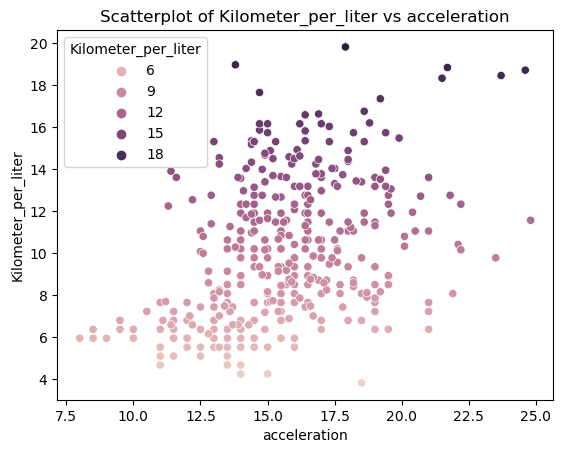

In [97]:
sns.scatterplot(x='acceleration',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs acceleration')
plt.show()

In [98]:
np.corrcoef(df.acceleration,df.Kilometer_per_liter)

array([[1.        , 0.42332854],
       [0.42332854, 1.        ]])

### It is slightly Positively correlated 
Acceleration and Kilometer_per_liter is 42.33% Positively Correlated

# year

We should take year as age of the car by subtracting the year when the data is collected and the year mentioned in the data but for now will perform normaly 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [100]:
df.year.value_counts()

year
1973    40
1978    36
1976    34
1975    30
1982    30
1970    29
1979    29
1972    28
1977    28
1981    28
1971    27
1980    27
1974    26
Name: count, dtype: int64

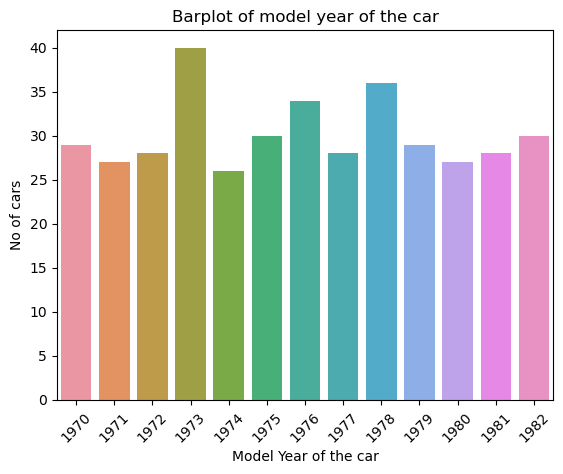

In [102]:
# bar plot
sns.countplot(x = df.year)
plt.title('Barplot of model year of the car')
plt.xticks(rotation=45)
plt.xlabel('Model Year of the car')
plt.ylabel('No of cars')
plt.show()

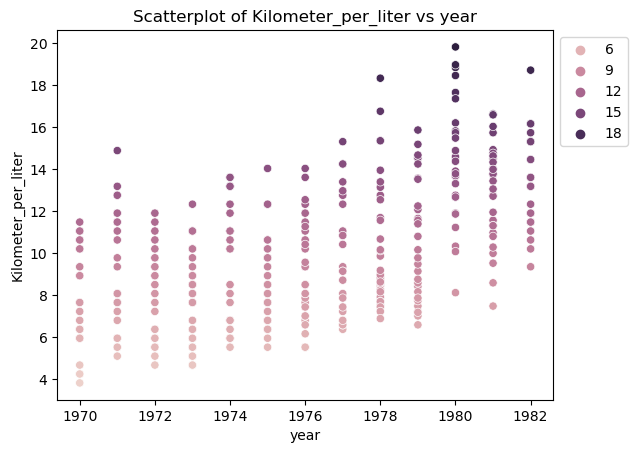

In [103]:
# scatterplot Kilometer_per_liter vs year
sns.scatterplot(x='year',y='Kilometer_per_liter',data=df,hue='Kilometer_per_liter')
plt.title('Scatterplot of Kilometer_per_liter vs year')
plt.legend(bbox_to_anchor=(1,1),loc=2)    # keeping the legend outside the graph
plt.show()

In [104]:
model_year = ols('Kilometer_per_liter ~ year',data = df).fit()
anova_year = sm.stats.anova_lm(model_year)
anova_year

,df,sum_sq,mean_sq,F,PR(>F)
year,1.0,1450.977436,1450.977436,198.259972,1.075794e-36
Residual,390.0,2854.238273,7.318560,NaN,NaN


year is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant.

# Name

In [105]:
# car brand and model name (unique for each instance)
df.name.describe()

count             392
unique            301
top       amc matador
freq                5
Name: name, dtype: object

In [106]:
# their are almost all the unique names so its not a good predictor so will drop it will building the model

<Axes: >

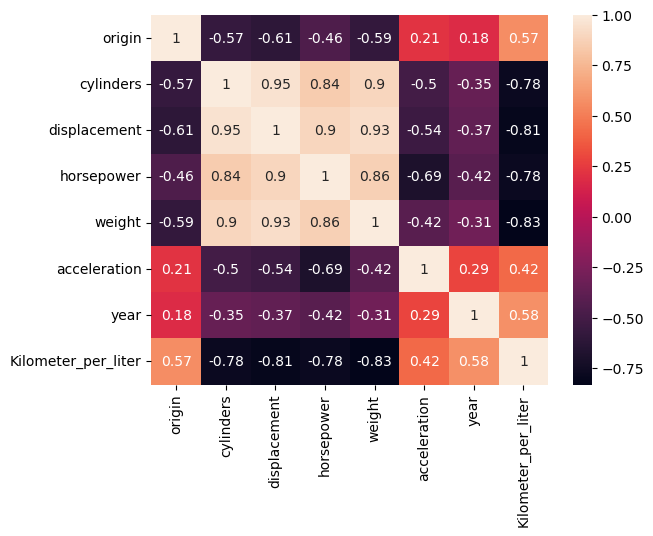

In [112]:
# Heatmap
# to get correlation values on heat map
sns.heatmap(df[df.describe().columns].corr(),annot=True)

You can see their is multicollinearity present in the data will perform VIF and will check and remove later on 

In [114]:
# correlation of target variable with predictor variables
df[df.describe().columns].corr()['Kilometer_per_liter']

origin                 0.565209
cylinders             -0.777618
displacement          -0.805127
horsepower            -0.778427
weight                -0.832244
acceleration           0.423329
year                   0.580541
Kilometer_per_liter    1.000000
Name: Kilometer_per_liter, dtype: float64

In [116]:
# dividing the data into predictor variable(x),target variable(y)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [117]:
# droping the name because its not a good predictor
df.drop('name',axis=1,inplace=True)

In [118]:
x=df.drop('Kilometer_per_liter',axis=1)
x.head(2)

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1,8,307.0,130.0,3504,12.0,1970
1,1,8,350.0,165.0,3693,11.5,1970


In [119]:
y=df['Kilometer_per_liter']
y.head()

0    7.652587
1    6.377156
2    7.652587
3    6.802299
4    7.227443
Name: Kilometer_per_liter, dtype: float64

In [120]:
# load the library for spliting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=0)

In [121]:
# standardising the data
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [122]:
# dimension of the datasets
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (313, 7)
x_test = (79, 7)
y_train = (313,)
y_test = (79,)


In [123]:
# after standartizing build the model
# building the model
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
score=sgdr.score(x_train,y_train)
print('R-squared =',score)

R-squared = 0.8145250467428966


In [124]:
from sklearn.metrics import r2_score
y_test_pred=sgdr.predict(x_test)
r2_score(y_test,y_test_pred)

0.83610664488845

In [125]:
# prediction
y_pred=sgdr.predict(x_test)

# evaluating the prediction

from sklearn.metrics import mean_squared_error          # to find the MSE (error)
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

MSE = 1.8412430796748498
RMSE = 1.356924124509123


In [126]:
# Now will perform using Linear regression using sklearn
from sklearn.linear_model import LinearRegression

In [127]:
lr=LinearRegression()
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_mse = 2.003383812058899
test_mse = 1.8383241224400717
train_r2_score = 0.8165058068251202
test_r2_score = 0.8363664681024058


In [128]:
import numpy as np
np.sqrt(2.0033)

1.4153798076841424

In [129]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,7.227443
5,1,8,429.0,198.0,4341,10.0,1970,6.377156
6,1,8,454.0,220.0,4354,9.0,1970,5.952012
7,1,8,440.0,215.0,4312,8.5,1970,5.952012
8,1,8,455.0,225.0,4425,10.0,1970,5.952012
9,1,8,390.0,190.0,3850,8.5,1970,6.377156


Both Low Biase and Low Variance 
   We are getting the generalized Model

In [130]:
x.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1,8,307.0,130.0,3504,12.0,1970
1,1,8,350.0,165.0,3693,11.5,1970
2,1,8,318.0,150.0,3436,11.0,1970
3,1,8,304.0,150.0,3433,12.0,1970
4,1,8,302.0,140.0,3449,10.5,1970


In [133]:
x1=x.copy(deep=True)
sc=StandardScaler()
scaled=sc.fit_transform(x1)
x1=pd.DataFrame(data=scaled,columns=x1.columns)
x1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,-0.716641,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-0.716641,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.716641,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.716641,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.716641,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


## VIF[Variance inflation Factor]

In [135]:
# Will Perform VIF[Variance Inflation Factor] and check if the features have multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data=pd.DataFrame()
vif_data['feature']=x1.columns

# calculating VIF for each features
vif_data['VIF']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(vif_data)

        feature        VIF
0        origin   1.772386
1     cylinders  10.737535
2  displacement  21.836792
3    horsepower   9.943693
4        weight  10.831260
5  acceleration   2.625806
6          year   1.244952


In [136]:
x2=x1.drop('displacement',axis=1)

vif_data=pd.DataFrame()
vif_data['feature']=x2.columns

# calculating VIF for each features
vif_data['VIF']=[variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
print(vif_data)

        feature       VIF
0        origin  1.594220
1     cylinders  6.008253
2    horsepower  9.088413
3        weight  9.219674
4  acceleration  2.598356
5          year  1.239409


In [137]:
x3=x1.drop(['displacement','weight'],axis=1)

vif_data=pd.DataFrame()
vif_data['feature']=x3.columns

# calculating VIF for each features
vif_data['VIF']=[variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
print(vif_data)

        feature       VIF
0        origin  1.495100
1     cylinders  4.155143
2    horsepower  5.323311
3  acceleration  1.996560
4          year  1.209909


In [138]:
x4=x1.drop(['displacement','weight','horsepower'],axis=1)

vif_data=pd.DataFrame()
vif_data['feature']=x4.columns

# calculating VIF for each features
vif_data['VIF']=[variance_inflation_factor(x4.values,i) for i in range(len(x4.columns))]
print(vif_data)

        feature       VIF
0        origin  1.495041
1     cylinders  1.999959
2  acceleration  1.384478
3          year  1.159429


### We were considering VIF < 5 to build a model

In [139]:
X_train,X_test,y_train,y_test=train_test_split(x4,y,test_size=0.2,random_state=0)

In [140]:
lr1=LinearRegression()
lr1.fit(X_train,y_train)
train_pred=lr1.predict(X_train)
test_pred=lr1.predict(X_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_mse = 2.993885505341371
test_mse = 2.3970912502140957
train_r2_score = 0.7257836456729684
test_r2_score = 0.7866292985196145


## Building a Model Using OLS [Ordinary Least Square Method]

In [141]:
# keep only selected columns

In [142]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

In [143]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols  # ordinary least squares
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [144]:
df.shape

(392, 8)

In [145]:
392*0.20

78.4

In [146]:
78-392

-314

In [147]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

In [148]:
# keep predicted with target variable
# spliting the data for train and test
trn=df.iloc[0:314,]
tst=df.iloc[314:,]

In [150]:
# building the model
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

model1=smf.ols('Kilometer_per_liter ~ origin+cylinders+displacement+horsepower+weight+acceleration+year',data=trn).fit()
print(model1.summary())


                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.821
Model:                             OLS   Adj. R-squared:                  0.817
Method:                  Least Squares   F-statistic:                     200.8
Date:                 Wed, 06 Sep 2023   Prob (F-statistic):          2.19e-110
Time:                         23:47:24   Log-Likelihood:                -503.00
No. Observations:                  314   AIC:                             1022.
Df Residuals:                      306   BIC:                             1052.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -470.1232     50.410    

### You can see their is a difference between R-squared and Adj. R-squared it is because of unwanted features which are increasing the curse of dimentionality in the data so will drop few features based on p-value

In [152]:
# If the p-value is greater than 0.05 then remove those variable from building the model

model2=smf.ols('Kilometer_per_liter~origin+weight+year',data=trn).fit()
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.819
Model:                             OLS   Adj. R-squared:                  0.817
Method:                  Least Squares   F-statistic:                     466.1
Date:                 Wed, 06 Sep 2023   Prob (F-statistic):          1.63e-114
Time:                         23:48:18   Log-Likelihood:                -505.34
No. Observations:                  314   AIC:                             1019.
Df Residuals:                      310   BIC:                             1034.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -471.7209     47.205     -9.99

In [153]:
# the above one is the final data  --- model2 is the winning model

In [154]:
# Make test data in two parts

#make 2parts of test data
# one, only having predictors and another one having only Target variable

In [155]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 316 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               78 non-null     int64  
 1   cylinders            78 non-null     int64  
 2   displacement         78 non-null     float64
 3   horsepower           78 non-null     float64
 4   weight               78 non-null     int64  
 5   acceleration         78 non-null     float64
 6   year                 78 non-null     int64  
 7   Kilometer_per_liter  78 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 5.5 KB


In [156]:
x_tst=tst.iloc[:,tst.columns!='Kilometer_per_liter']   # only the predictor data
y_tst=tst.iloc[:,tst.columns=='Kilometer_per_liter']   # only the target variable

In [157]:
# pr2ediction on test data
pred_1=model2.predict(x_tst)

In [158]:
# residuals
# if you want to find the residuals we want to convert target variable from dataframe to series
y_tst_series=y_tst.iloc[:,0]

In [159]:
# now you can perform the residuals 
residuals=y_tst_series-pred_1
residuals

316   -1.412382
317    1.733068
318    0.828531
319    1.040265
320    3.191360
321    0.724690
322    6.456066
323    0.864416
324    3.990233
325    5.724884
326    5.972403
327    4.546564
328    2.581824
329    4.950424
331    1.102448
332   -1.044643
333    2.563046
334   -2.498340
335    2.817095
337    0.872733
338   -0.461774
339   -0.351374
340   -0.729298
341   -1.442466
342    0.463965
343    2.125472
344    3.004754
345    0.437500
346    0.015880
347    1.787201
348    2.273847
349    0.579491
350    2.033639
351    1.477595
352    0.408848
353    0.938217
355    0.976567
356    0.776764
357    1.657294
358    1.155019
359    1.476434
360    2.405366
361   -0.812914
362   -1.247468
363   -0.170912
364    2.396076
365   -2.001040
366   -2.085572
367   -0.078996
368   -0.415919
369    1.942541
370    1.120817
371    0.144500
372   -0.176462
373   -1.124216
375    1.437118
376    1.666026
377   -1.023469
378    2.962555
379    2.112267
380    1.581163
381    1.694590
382    0

In [160]:
# rmse
# finding the square of error
se_1=residuals.pow(2)
# finding the sum of it
sse_1=se_1.sum()
# finding the mean of it
mse=sse_1/len(se_1)
# finding the square root 
import math
rmse=math.sqrt(mse)
rmse

2.2489717591801006

In [161]:
len(y_tst_series)

78

In [162]:
# ploting the graph

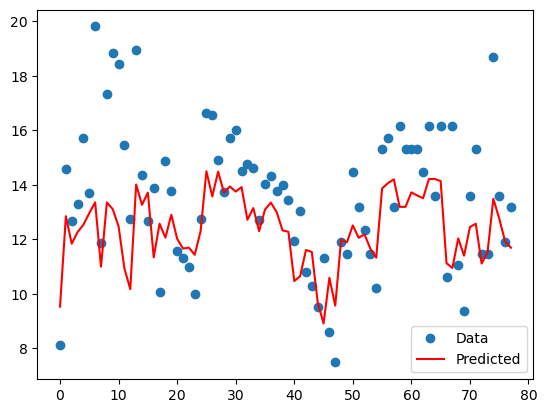

In [163]:
import matplotlib.pyplot as plt
obsno=np.arange(0,78,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_tst_series,'o',label='Data')
ax.plot(obsno,pred_1,'r-',label='Predicted')
ax.legend(loc='best')

In [164]:
# Assemptions to be met in case of ols method

In [165]:
selected_columns=df[['origin','weight','year']]

#  1.Normality
- make histogram of residuals
- and check whether its approximately bell-shaped,symmetrical

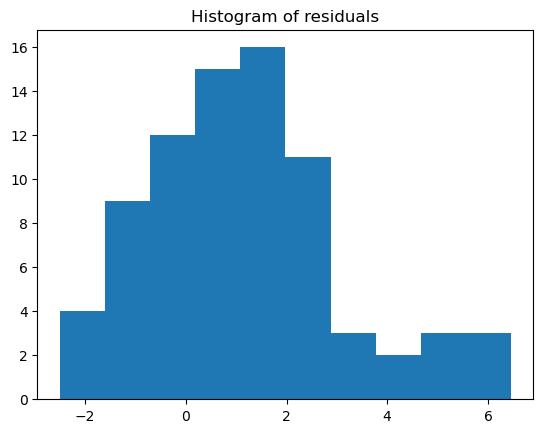

In [166]:
plt.hist(residuals)
plt.title('Histogram of residuals')
plt.show()

<Axes: ylabel='Density'>

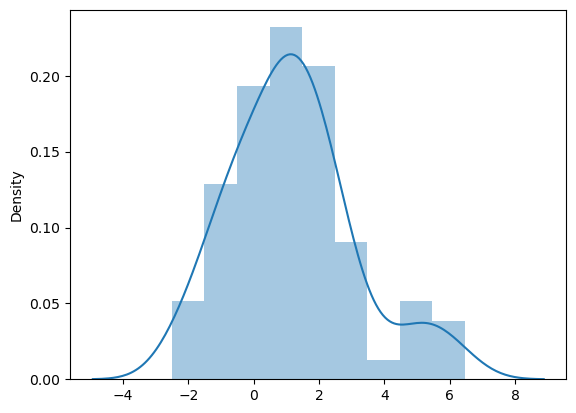

In [167]:
sns.distplot(residuals)

# 2. Linearity 
- make scatter plot
- x=each continious variable one by one 
- y=target variable
- see whether a linear relationship is visible

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.7 KB


In [140]:
# segregrating the numerical variable
da1=df.select_dtypes(exclude='object')

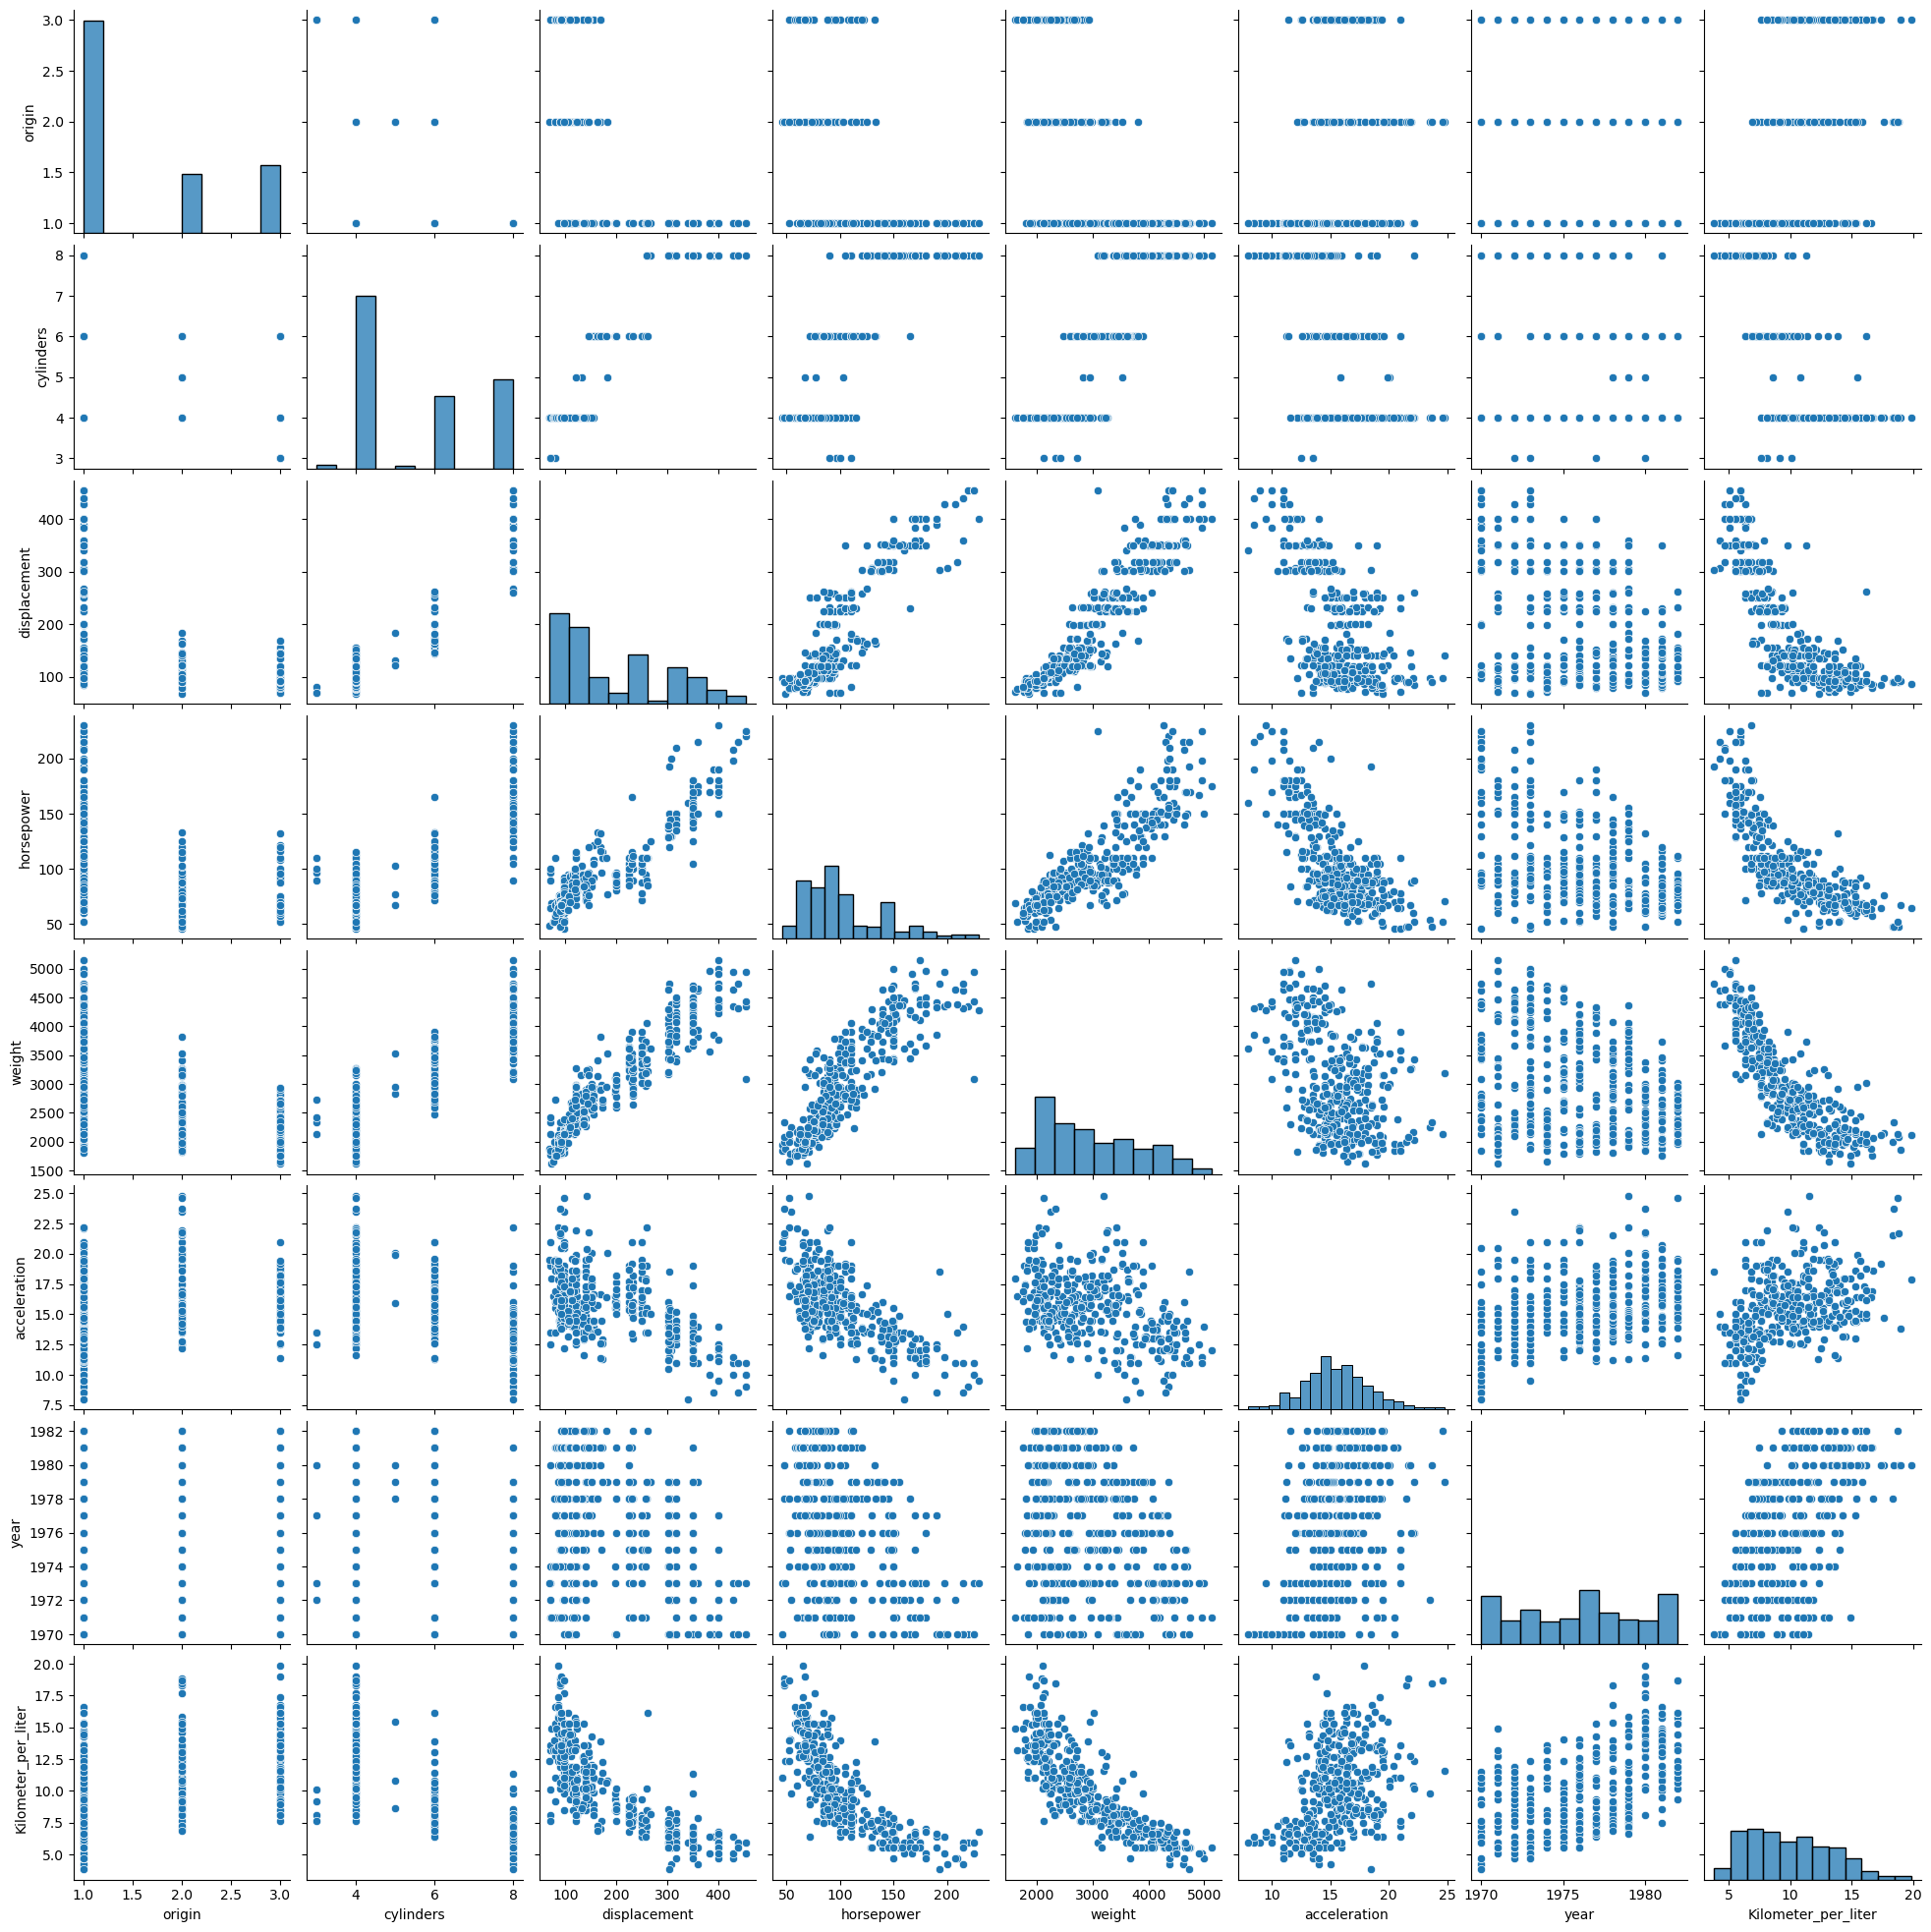

In [141]:
# ploting for good predictors including the target variable
sns.pairplot(da1)

In [142]:
da1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

<AxesSubplot:xlabel='weight', ylabel='Kilometer_per_liter'>

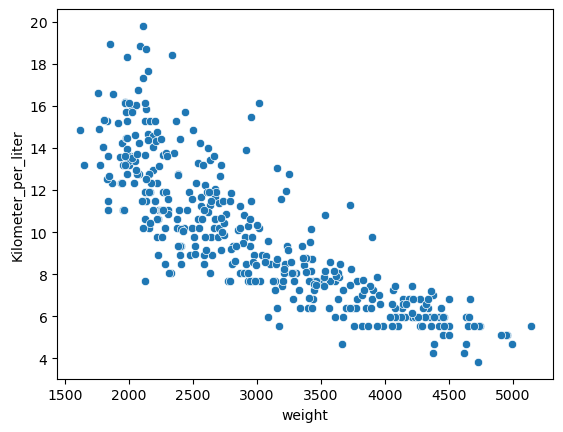

In [143]:
sns.scatterplot(df.weight,df.Kilometer_per_liter)

## 3. independence of observation

## make scatter plot
x=obsno        
y=residuals       

if their is no gemoteric pattern is visible, assumption of independence of error is holding good and not violated

Text(0.5, 1.0, 'Scatterplot of obsno vs residuals')

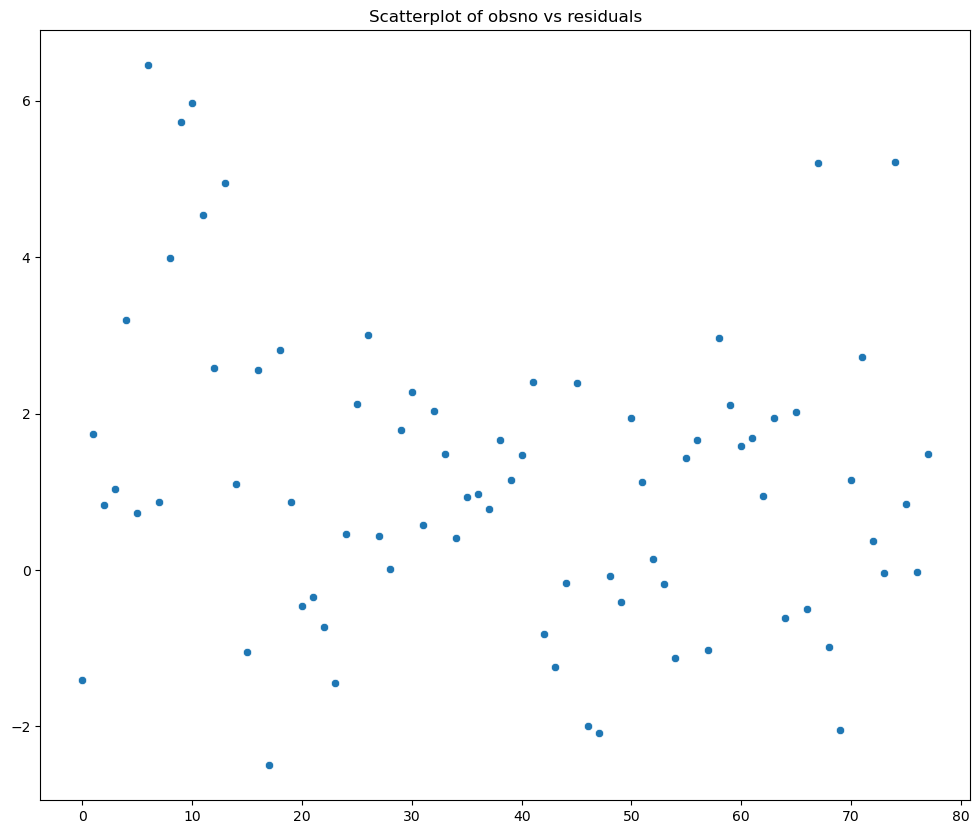

In [169]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=obsno,y=residuals)
plt.title('Scatterplot of obsno vs residuals')

# 4_Constant Error Variance [homoscadasticity]

**Make scatter plot,**

**x = predict**

**y = residuals**

**if, no geometric pattern is visible,
assumption of homoscadasticity is holding good and 
not violated**


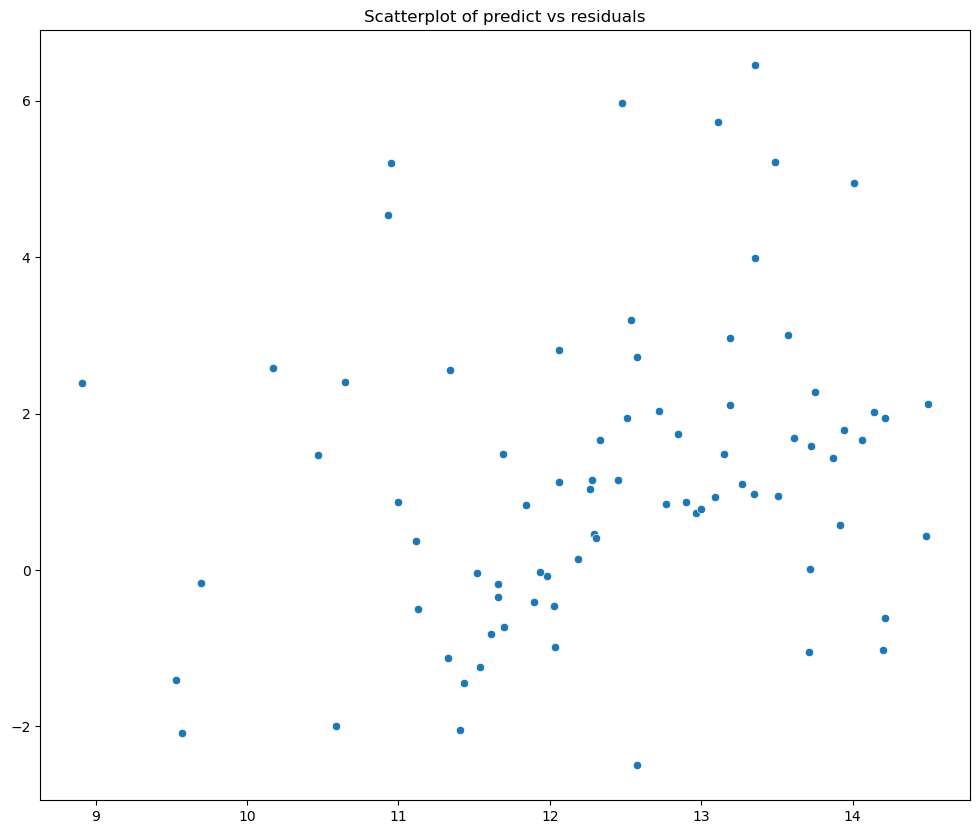

In [145]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=pred_1,y=residuals)
plt.title('Scatterplot of predict vs residuals')
plt.show()

# 5_VIF    [Variance Inflation Factor]

In [146]:
# calculating VIF for each features
# we want to take only the numerical variable to find the vif

x5=x1[['origin','weight','year']]

vif_data=pd.DataFrame()
vif_data['feature']=x5.columns

# calculating VIF for each features
vif_data['VIF']=[variance_inflation_factor(x5.values,i) for i in range(len(x5.columns))]
print(vif_data)

  feature       VIF
0  origin  1.520292
1  weight  1.625522
2    year  1.105651


### You can see their is No Multicolinearity present in the data      VIF<5

## 6. Durbin Watson

In [147]:
# import numpy and statsmodels for durbin watson

import numpy as np
from statsmodels.stats.stattools import durbin_watson

gfg = durbin_watson(model2.resid)


print("Durbin Watson Value :", round(gfg, 2))

Durbin Watson Value : 1.13
